In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [3]:
df = sns.load_dataset('tips')

In [4]:
df.shape

(244, 7)

In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


test the claim that the average total bill is 20?

S1: H0: mu_total bill =20

    H1: mu_total bill !=20
    

In [8]:
## S2: state alpha
alpha = 0.05

In [30]:
## S3: one sample  t test ( test of mean)
## test statistic = (xbar -mu)/ s/ sqrt(n)
xbar = df.total_bill.mean()
mu= 20
s= df.total_bill.std()
n= len(df.total_bill)
std_error= s/ np.sqrt(n)
t_stat= (xbar-mu)/std_error
t_crit = st.t.ppf(alpha/2, n-1)
print(abs(t_stat), abs(t_crit))


0.37559294451918884 1.9697743954258797


Decision rule : CVA : if abs( test stat) < abs( critical value) --> acccept H0
                      else reject H0
                      
Inference : based on CVA , since abs ( test stat) < abs( critical) --> accept H0; 
which means the sample belongs to the population whose mena =20 
 or 
 we can conclude that the population avergae is 20 

In [31]:
st.t.interval(1-alpha, n-1,  xbar, std_error)

(18.663331704358477, 20.90855354154317)

In [32]:
## PVA: if p value >= alpha --> accept H0; else reject H0;
p_value= st.t.cdf(t_stat, n-1)*2
print( alpha, p_value)

0.05 0.7075471935626767


Inference : based on PVA , since p value  > alpha --> accept H0; 
which means the sample belongs to the population whose mean =20 
 or 
 we can conclude that the population avergae is 20 

Confidence Interval Approach ( CIA) : since population mean lies b/w confidence limits ---> accept H0.

which means the sample belongs to the population whose mean =20 
 or 
 we can conclude that the population avergae is 20 

In [33]:
st.ttest_1samp(df.total_bill, mu)

Ttest_1sampResult(statistic=-0.37559294451919506, pvalue=0.7075471935626723)

test the claim that the average total bill is atleast 20?

H0: mu > =20

H1: mu < 20


In [36]:
st.ttest_1samp(df.total_bill, mu, alternative='less')

Ttest_1sampResult(statistic=-0.37559294451919506, pvalue=0.35377359678133613)

PVA: since p value(0.35) is > alpha (0.05) --> accept H0

hence the calim is true , the avg pop total bill is > =20

#### Problem Statement: Is the avg total bill same for lunch and dinner , verify @ 1% level of confidence?

In [37]:
df.groupby('time')['total_bill'].describe().T

time,Lunch,Dinner
count,68.000000,176.000000
mean,17.168676,20.797159
std,7.713882,9.142029
min,7.510000,3.070000
25%,12.235000,14.437500
50%,15.965000,18.390000
75%,19.532500,25.282500
max,43.110000,50.810000


<AxesSubplot:xlabel='time', ylabel='total_bill'>

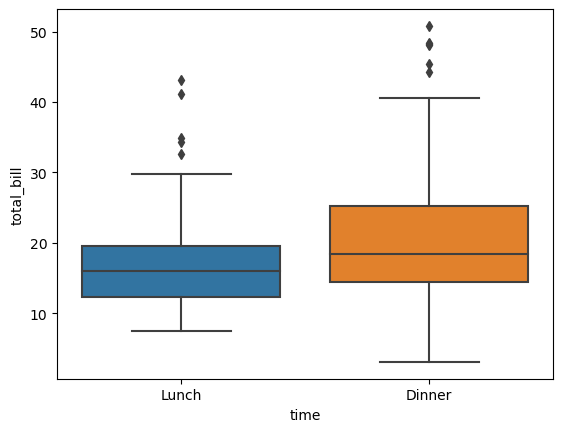

In [38]:
sns.boxplot(y=df.total_bill, x=df.time)

time
Lunch     AxesSubplot(0.125,0.11;0.775x0.77)
Dinner    AxesSubplot(0.125,0.11;0.775x0.77)
Name: total_bill, dtype: object

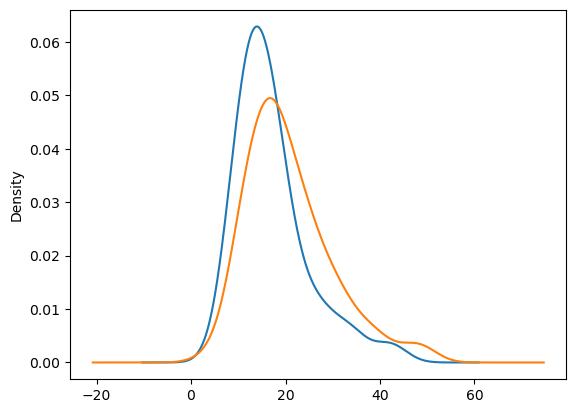

In [39]:
df.groupby('time')['total_bill'].plot(kind='kde')

H0: mu_tt_lunch = mu_tt_dinner

H1: mu_tt_lunch != mu_tt_dinner



Test of Normality:  
H0:  pop data = Normal

H1: pop data != normal



In [41]:
st.shapiro(df.total_bill)

ShapiroResult(statistic=0.9197186231613159, pvalue=3.3244529351605934e-10)

test of Normality : since the sample size >30 --> as per CLT it follows normal

test of variance Equalty :

H0: pop1 var = pop2 var

H1: pop1 var != pop2 var


In [42]:
ltt = df[df.time=='Lunch']['total_bill']
dtt = df[df.time=='Dinner']['total_bill']

In [43]:
## test of variance Equality ( levene test)

st.levene(ltt, dtt)

LeveneResult(statistic=2.6906995489829337, pvalue=0.1022346107726258)

since p value > alpha --> accept H0

we can conclude that two populations are having same variance

In [44]:
st.ttest_ind(ltt,dtt,equal_var=True)

Ttest_indResult(statistic=-2.8976375218366424, pvalue=0.004104621407595674)

In [61]:
x1bar= ltt.mean()
x2bar= dtt.mean()
n1= len(ltt)
n2= len(dtt)
s1= ltt.std(ddof=1)
s2= dtt.std(ddof=1)
s= np.sqrt(((n1-1)*s1**2+(n2-1)*s2**2)/(n1+n2-2))
s

8.769944956909498

In [63]:
t_st = (x1bar-x2bar)/(s*((np.sqrt((1/n1)+(1/n2)))))
t_st

-2.8976375218366544

In [64]:
st.t.sf(abs(t_st), n1+n2-2)*2

0.004104621407595523

since p value(0.004) is less tha alpha(0.01)--> reject H0; 

Inference: Hence we can conclude that the lunch and dinner avg total bill is different

#### Problem Statement: Is the weight reduction succefful? test this with the below data @ 5% 

In [69]:
wt_before = np.array([90,100,120,110,99,89,79,117,123,133,111])
wt_after= np.array([78,101,116,99,107,90,70,110,112,100,99])

H0: mu_diff >=0

H1: mu_diff < 0

In [70]:
diff= wt_after-wt_before

In [80]:
st.ttest_rel(wt_after, wt_before, alternative='less')

Ttest_relResult(statistic=-2.545976576223273, pvalue=0.014531892447383702)

In [81]:
(diff.mean()-0)/(diff.std(ddof=1)/np.sqrt(len(wt_after)))

-2.545976576223273

In [83]:
st.ttest_1samp(diff, 0, alternative='less')

Ttest_1sampResult(statistic=-2.545976576223273, pvalue=0.014531892447383702)

Inference: since p value (0.014) < alpha --> reject H0.

hence we can say that the weight reduction program is successful.

#### Problem Statement : is the smoking proportion in the tips data is 40%, test this claim @ 10% level of significance?

In [84]:
df.smoker.value_counts(normalize=True)

No     0.618852
Yes    0.381148
Name: smoker, dtype: float64

H0: P= 0.4

H1: P!=0.4

In [86]:
P=0.4
p = 0.381148
q= 1-p
n= len(df.smoker)
std_err = np.sqrt(p*q/n)
z_stat= (p-P)/std_err
p_value= st.norm.cdf(z_stat)*2
print(z_stat, p_value)

-0.6063342797464787 0.5442927997925102


In [102]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [88]:
df.smoker.value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [101]:
proportions_ztest(93,244,0.4)

(-0.6063491832694735, 0.5442829052719291)

In [106]:
proportion_confint(93,244,0.1 )

(0.33000615835179786, 0.4322889236154152)

since p value(0.54) > alpha (0.1) ---> accept H0;

hence we can conclude that the population  proportion of smoking is 40%

Problem Statement: Is the smoking proportion varies with resepect to gender? tets this claim @5% level of significance?

H0: smoking_P_male = smoking_P_female 

H1: smoking_P_male != smoking_P_female 

In [107]:
pd.crosstab(df.smoker, df.sex)

sex,Male,Female
smoker,,
Yes,60,33
No,97,54


In [108]:
x1= 60
x2=33
n1=157
n2=87
p1=x1/n1
p2=x2/n2
p=(x1+x2)/(n1+n2)
q=1-p
std_err= np.sqrt(p*q*((1/n1)+(1/n2)))
z_stat=(p1-p2)/std_err
pvalue= st.norm.sf(abs(z_stat))*2
print(z_stat, pvalue)
                 

0.043986572230939734 0.9649151073157315


In [109]:
proportions_ztest([x1,x2],[n1,n2])

(0.043986572230939734, 0.9649151073157315)

Inference: Since p value(0.960 > alpha(0.05) ---> accept H0. 

hence we can conclude that the smoking proportion does not vary wrt gender.